In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv")

In [3]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40805 entries, 0 to 40804
Data columns (total 8 columns):
SNo                40805 non-null int64
ObservationDate    40805 non-null object
Province/State     22790 non-null object
Country/Region     40805 non-null object
Last Update        40805 non-null object
Confirmed          40805 non-null float64
Deaths             40805 non-null float64
Recovered          40805 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,40805.000000,40805.000000,40805.000000,40805.000000
mean,20403.000000,7403.745448,465.412621,2728.499547
std,11779.533204,26483.022808,2392.737598,16413.103519
min,1.000000,0.000000,0.000000,0.000000
25%,10202.000000,44.000000,0.000000,0.000000
50%,20403.000000,458.000000,7.000000,29.000000
75%,30604.000000,2836.000000,82.000000,570.000000
max,40805.000000,405843.000000,41128.000000,547386.000000


In [6]:
data.shape

(40805, 8)

In [7]:
data.nunique()

SNo                40805
ObservationDate      143
Province/State       709
Country/Region       223
Last Update         1884
Confirmed          10830
Deaths              3173
Recovered           5482
dtype: int64

In [8]:
data.sort_values(by = 'Confirmed', ascending=False)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
32120,32121,05/31/2020,NaN,Russia,2020-06-01 02:32:46,405843.0,4693.0,171883.0
31565,31566,05/30/2020,NaN,Russia,2020-05-31 02:32:45,396575.0,4555.0,167469.0
31011,31012,05/29/2020,NaN,Russia,2020-05-30 02:32:48,387623.0,4374.0,159257.0
40577,40578,06/12/2020,New York,US,2020-06-13 03:33:14,381714.0,30758.0,0.0
39848,39849,06/11/2020,New York,US,2020-06-12 05:09:52,380892.0,30580.0,0.0
39123,39124,06/10/2020,New York,US,2020-06-11 03:33:41,380156.0,30542.0,0.0
38412,38413,06/09/2020,New York,US,2020-06-10 04:07:00,379482.0,30458.0,0.0
30458,30459,05/28/2020,NaN,Russia,2020-05-29 02:32:50,379051.0,4142.0,150993.0
37728,37729,06/08/2020,New York,US,2020-06-09 03:33:03,378799.0,30417.0,0.0
37043,37044,06/07/2020,New York,US,2020-06-08 03:33:22,378097.0,30374.0,0.0


Russia has the highest number of cumulative cases up to 05/31/2020 - 405843 cases.

In [9]:
country_data = data.groupby('Country/Region').sum()
country_data = country_data.drop('SNo', axis=1)
country_data

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,491513.0,10035.0,53623.0
Albania,61819.0,2200.0,41160.0
Algeria,406979.0,34862.0,214148.0
Andorra,55520.0,3086.0,33136.0
Angola,3446.0,201.0,936.0
Antigua and Barbuda,1766.0,191.0,925.0
Argentina,631181.0,23157.0,187677.0


In [10]:
country_data.sort_values(by='Confirmed', ascending=False)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,88972448.0,4993653.0,16537321.0
Brazil,17172054.0,1009660.0,7428254.0
Spain,16095371.0,1763203.0,8411642.0
Italy,15872416.0,2140610.0,7104480.0
Russia,14949259.0,161716.0,5053499.0
UK,13951022.0,1943716.0,64725.0
France,12238098.0,1703149.0,3719836.0
Germany,12184741.0,466247.0,8950846.0
Mainland China,10213288.0,463060.0,8063275.0


In [11]:
Nigeria_data = data[data['Country/Region']== 'Nigeria']
Nigeria_data = Nigeria_data[['ObservationDate', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]
Nigeria_data.head()

,ObservationDate,Last Update,Confirmed,Deaths,Recovered
2683,02/28/2020,2020-02-28T16:23:03,1.0,0.0,0.0
2800,02/29/2020,2020-02-28T16:23:03,1.0,0.0,0.0
2926,03/01/2020,2020-02-28T16:23:03,1.0,0.0,0.0
3060,03/02/2020,2020-02-28T16:23:03,1.0,0.0,0.0
3209,03/03/2020,2020-02-28T16:23:03,1.0,0.0,0.0


In [12]:
Nigeria_data = Nigeria_data.groupby('ObservationDate', as_index=False).sum()

In [13]:
Nigeria_data['Recovered %'] = (Nigeria_data['Recovered']/Nigeria_data['Confirmed']) * 100
Nigeria_data['Death %'] = (Nigeria_data['Deaths']/Nigeria_data['Confirmed']) * 100

In [14]:
Nigeria_data.head()

,ObservationDate,Confirmed,Deaths,Recovered,Recovered %,Death %
0,02/28/2020,1.0,0.0,0.0,0.0,0.0
1,02/29/2020,1.0,0.0,0.0,0.0,0.0
2,03/01/2020,1.0,0.0,0.0,0.0,0.0
3,03/02/2020,1.0,0.0,0.0,0.0,0.0
4,03/03/2020,1.0,0.0,0.0,0.0,0.0


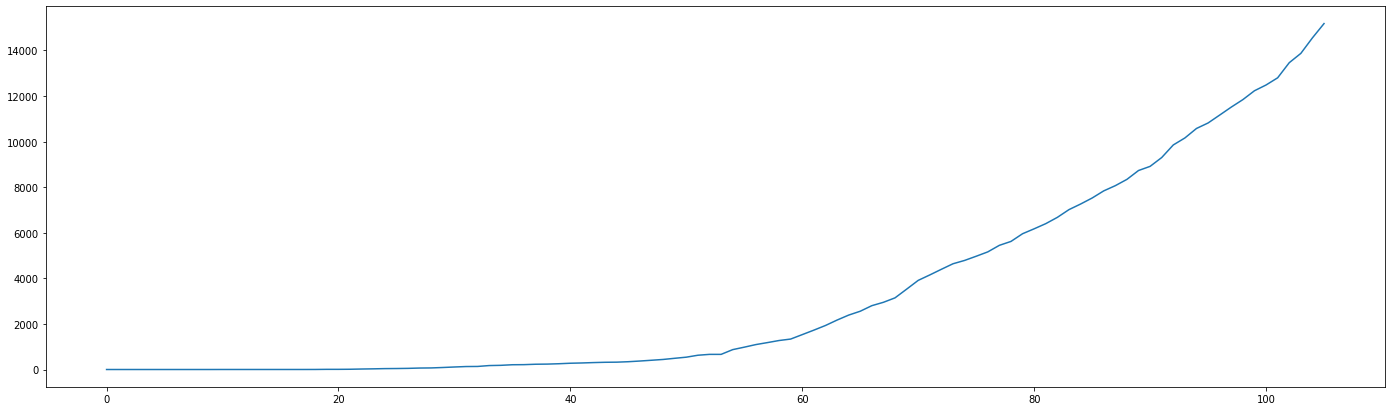

In [15]:
plt.figure(figsize=(24,7))
plt.plot('Confirmed', data=Nigeria_data)
plt.show()

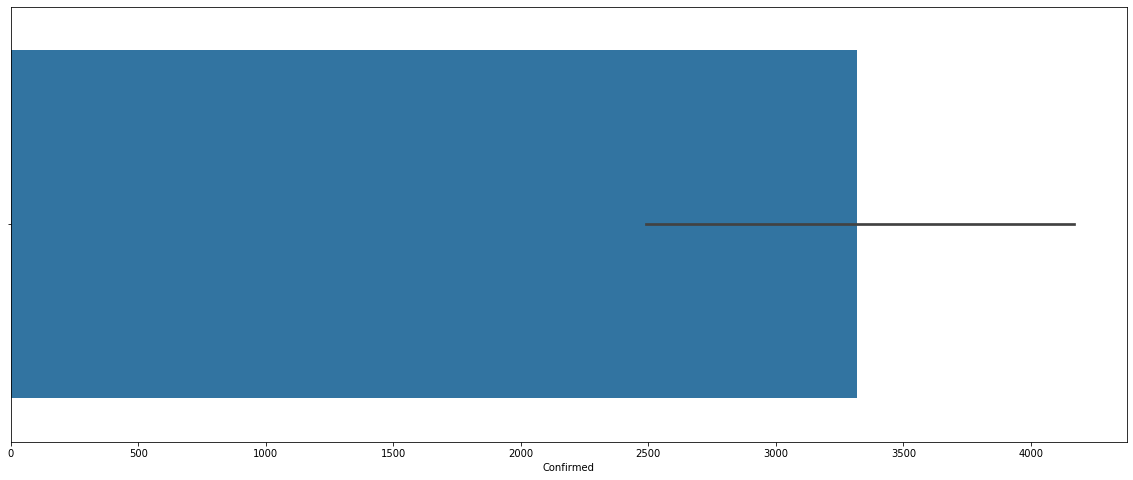

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(Nigeria_data.Confirmed)

In [17]:
US_data = data[data['Country/Region']== 'US']
US_data = US_data[['ObservationDate', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]
US_data.head()

,ObservationDate,Last Update,Confirmed,Deaths,Recovered
31,01/22/2020,1/22/2020 17:00,1.0,0.0,0.0
69,01/23/2020,1/23/20 17:00,1.0,0.0,0.0
117,01/24/2020,1/24/20 17:00,1.0,0.0,0.0
118,01/24/2020,1/24/20 17:00,1.0,0.0,0.0
158,01/25/2020,1/25/20 17:00,1.0,0.0,0.0
